# Apprentissage supervisé : Regression, DecisionTreeRegressor, RandomForestRegressor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pp

## 1. Préparation des données

### (1.1 Téléchargement de données)

### 1.2 Information sur les données

In [2]:
df = pd.read_csv("./data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A priori, vu les valeurs de la cible median_house_value, nous avons ici à traiter un problème de régression.

In [3]:
def info_dataframe (df) :
    print("Le nombre de lignes du tableau est :", df.shape[0])
    print("Le nombre de colonnes du tableau est :", df.shape[1])
    print(df.dtypes)
    print(df.iloc[:,:].isna().sum())
info_dataframe(df)

Le nombre de lignes du tableau est : 20640
Le nombre de colonnes du tableau est : 10
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Total bedroom a des valeurs nulles. Pour éviter qu'elles ne faussent notre modèle, on peut opter pour une imputation de ces 
valeurs avec les outils de scikitlearn et la méthode médiane.

3.

Pour mémoire : 
`type(df[["ocean_proximity"]])` renvoie "pandas.core.frame.DataFrame" tandis que `type(df["ocean_proximity"])` renvoie "pandas.core.series.Series".

In [4]:
with pd.option_context('display.max_rows', None):
     print(df[["ocean_proximity"]].apply(lambda x: x.value_counts()).T.stack())

ocean_proximity  <1H OCEAN     9136
                 INLAND        6551
                 NEAR OCEAN    2658
                 NEAR BAY      2290
                 ISLAND           5
dtype: int64


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163A3453550>,
      dtype=object)

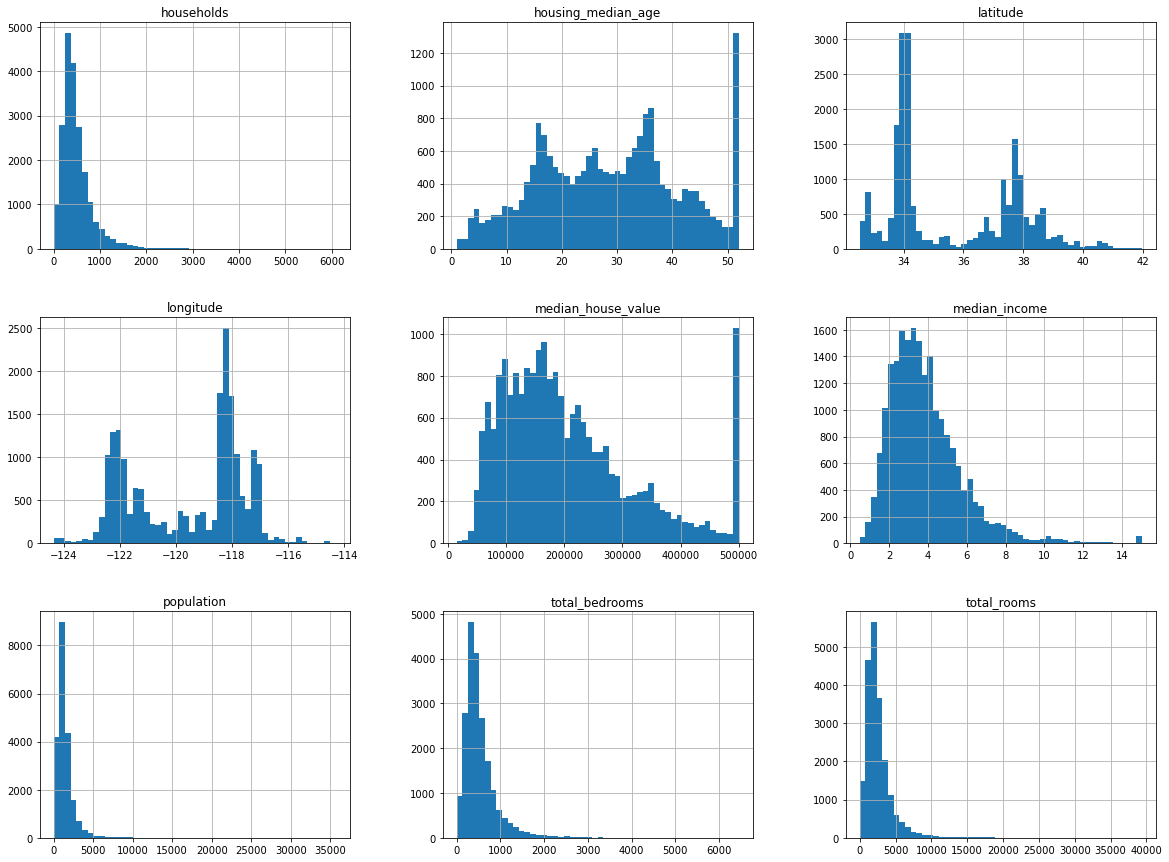

In [6]:
df.hist(bins = 50, figsize = (20,15))

### 1.3 Répartition des données

1.3.1. Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez pour 80% pour l’apprentissage et 20% pour le test.

In [7]:
Y = df[["median_house_value"]]

col = list(df.columns)
col.remove("median_house_value")

X = df[col]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.2)

1.3.2. Affichez l’en-tête de la base de test

In [10]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

### 1.4 Découverte et visualisation des données

1.4.1 Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour le type scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètre qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

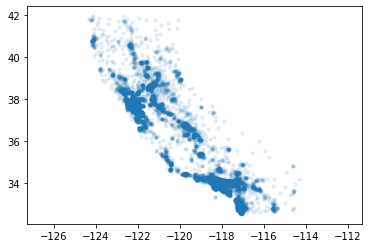

In [11]:
#On met les axes égaux pour avoir un repère orthonormé géographiquement correct.
pp.axis('equal')
pp.scatter(X_train["longitude"], X_train["latitude"], alpha = 0.1, marker = ".")

1.4.2. Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le
prix des maisons (target). Optez pour une valeur égale à False de "sharex".

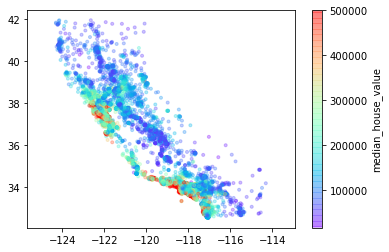

In [12]:
pp.axis('equal')

#On utilise une cmap (gradient de couleur) et pour gérer le gradient on passe les valeurs de la target dans un c.

pp.scatter(x = X_train["longitude"],
           y = X_train["latitude"],
           c = Y_train.values,
           alpha = 0.3,
           marker = ".",
           cmap = "rainbow")

pp.colorbar().set_label('median_house_value')

1.4.3. Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques
maisons. Pour ce faire :

• Téléchargez l’image de la californie

• Utilisez la fonction imread du sous-module image du module matplotlib

• Utilisez la fonction imshow du sous-module pyplot du module matplotlib

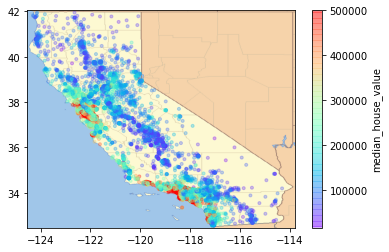

In [13]:
from matplotlib import image

carte_californie = image.imread("california.png")

pp.imshow(carte_californie, zorder=1, aspect='auto', extent=[-124.55, -113.80, 32.45, 42.05],)


pp.scatter(x = X_train["longitude"],
           y = X_train["latitude"],
           c = Y_train.values,
           alpha = 0.3,
           marker = ".",
           cmap = "rainbow",
           zorder=2)

pp.colorbar().set_label('median_house_value')

1.4.4. Une pratique très intéressante dans l’analyse de données est l’étude des corrélation entre
les variables. Créez un code qui affiche, en valeur, la corrélation de l’attribut "median_
house_value" avec les autres attributs. Qu’est ce que vous remarquez ?

In [14]:
df.corr()[["median_house_value"]]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


On remarque que la plus forte corrélation est une corrélation positive du coût médian de la maison avec la variable de revenu médian. Les autres variables corrèlent finalement assez peu.

## 1.5 Nettoyage des données

Avant d’intégrer les données dans un algorithme d’apprentissage automatique, il est indispensable
de séparer le "features" et la valeur cible (target).
### 1.5.1. Créez un code permettant de créer deux variables :

• Une première contenant que les input. Utilisez la fonction drop du module pandas

• Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

In [136]:
# Non applicable car split réalisé plus haut.

### 1.5.2.
Dans la question 8, vous avez dû remarquer que l’attribut "total_bedrooms" a des valeurs
manquantes (NaN). Pour remédier à ceci, il existes trois options :

• Supprimer les valeurs manquantes (NaN)

• Supprimer l’attribut "total_bedrooms"

• Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane,
. . . ).

Nous optons pour cette méthode. Ecrivez un code qui remplace les valeurs manquantes
par la médiane. Utilisez les fonctions median et fillna du module Pandas. Vérifiez
avec la fonction "info" si le problème a été résolu.


In [15]:
X_train["total_bedrooms"].isna().sum()

174

In [16]:
X_train["total_bedrooms"] = X_train["total_bedrooms"].fillna(X_train["total_bedrooms"].mean())
X_train["total_bedrooms"].isna().sum()

<ipython-input-16-4cb3c137967d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["total_bedrooms"] = X_train["total_bedrooms"].fillna(X_train["total_bedrooms"].mean())


0

In [17]:
X_test["total_bedrooms"].isna().sum()

33

In [18]:
X_test["total_bedrooms"] = X_test["total_bedrooms"].fillna(X_test["total_bedrooms"].mean())
X_test["total_bedrooms"].isna().sum()

<ipython-input-18-d6e99fa25666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["total_bedrooms"] = X_test["total_bedrooms"].fillna(X_test["total_bedrooms"].mean())


0

### 1.5.3.
Les algorithmes d’apprentissage profond préfère de travailler avec les données numériques.
Ceci est valable pour tous les attributs sauf "ocean_proximity". Vérifiez ceci en affichant 10
de ces valeurs. Transformer les valeurs qualitatives en des valeurs numériques.


In [19]:
X_train["ocean_proximity"].head(10)

7068      <1H OCEAN
1864      <1H OCEAN
9485         INLAND
7631      <1H OCEAN
17667     <1H OCEAN
3575      <1H OCEAN
6380         INLAND
14656    NEAR OCEAN
1371       NEAR BAY
5600      <1H OCEAN
Name: ocean_proximity, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
lab_enc.fit(X_train["ocean_proximity"])
X_train["ocean_proximity"] = lab_enc.transform(X_train["ocean_proximity"])

<ipython-input-20-245cfc01d6cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["ocean_proximity"] = lab_enc.transform(X_train["ocean_proximity"])


In [21]:
lab_enc = LabelEncoder()
lab_enc.fit(X_test["ocean_proximity"])
X_test["ocean_proximity"] = lab_enc.transform(X_test["ocean_proximity"])

<ipython-input-21-786289f9f08b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["ocean_proximity"] = lab_enc.transform(X_test["ocean_proximity"])


### 1.5.4. Affichez les données pour vérifier le résultat.

In [22]:
print(X_train["ocean_proximity"].head(10))
print(X_test["ocean_proximity"].head(10))

7068     0
1864     0
9485     1
7631     0
17667    0
3575     0
6380     1
14656    4
1371     3
5600     0
Name: ocean_proximity, dtype: int32
16064    4
6652     0
5720     0
12558    1
6661     1
12146    0
12377    1
623      3
3434     0
11262    0
Name: ocean_proximity, dtype: int32


## 2 Sélection, apprentissage et évaluation du modèle


### 2.1. Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.

In [23]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.coef_

array([[-4.26222683e+04, -4.23768344e+04,  1.14636542e+03,
        -6.67751599e+00,  8.64061854e+01, -3.87620862e+01,
         7.10807805e+01,  4.01392917e+04,  1.29306743e+02]])

### 2.2. Créez un code qui prédit les classes de la base d’apprentissage.
Pour ce faire, utilisez la
méthode predict de la classe LinearRegression en donnant comme argument les données
d’apprentissage. Ensuite, affichez les valeurs cible réelles et celles prédites.

In [24]:
Y_predit = lin_reg.predict(X_train)

In [25]:
print(Y_predit)

print(Y_train)

[[242760.27403101]
 [ 85800.92698209]
 [161716.169052  ]
 ...
 [280951.28810877]
 [182285.17736455]
 [151462.62311807]]
       median_house_value
7068             179800.0
1864             116700.0
9485             137500.0
7631             162900.0
17667            177600.0
...                   ...
13721            112500.0
17105            409300.0
17058            361900.0
2973             130100.0
12198            155600.0

[16512 rows x 1 columns]


### 2.3. Calculez la mesure RMSE du modèle de la régression linéaire.

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
#Pour une raison qui m'échappe, c'est en mettant "False" à l'argument "squared" qu'on obtient la RMSE et pas la MSE.
RMSE = mean_squared_error(Y_predit, Y_train ,squared = False) 
print(RMSE)

69220.87422038989


### 2.4. Refaites les deux étapes précédentes avec le modèle DecisionTreeRegressor.
Calculez la mesure RMSE du modèle DecisionTreeRegressor qui existe dans le sous-module tree du
module sklearn.
Pour plus d’informations sur les arbres de décision:
http://cedric.cnam.fr/vertigo/cours/ml2/tpArbresDecision.html

In [98]:
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()

tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [99]:
Y_predit_tree = tree_reg.predict(X_train)

In [100]:
print(Y_predit_tree)

print(Y_train)

[179800. 116700. 137500. ... 361900. 130100. 155600.]
       median_house_value
7068             179800.0
1864             116700.0
9485             137500.0
7631             162900.0
17667            177600.0
...                   ...
13721            112500.0
17105            409300.0
17058            361900.0
2973             130100.0
12198            155600.0

[16512 rows x 1 columns]


In [101]:
RMSE_tree = mean_squared_error(Y_predit_tree, Y_train ,squared = False) 
print(RMSE_tree)

0.0


On remarque un résultat étonnant, le RMSE de notre modèle de régression par arbre de décision est nul. Cela suggère un problème d'overfitting et on peut résoudre cela en utilisant une profondeur maximale *max_depth*. On aura peut-être un RMSE plus élevé mais un meilleur modèle.

In [102]:
tree_reg = tree.DecisionTreeRegressor()

tree_reg.fit(X_train, Y_train)
Y_predit_tree = tree_reg.predict(X_train)

RMSE_tree = mean_squared_error(Y_predit_tree, Y_train ,squared = False) 
print(RMSE_tree)

0.0


### 2.5.
Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure
que ce modèle fonctionne parfaitement sur la base d’apprentissage. Pour s’assurer, on va
répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la
méthode 10-fold cross-validation. Pour ce faire, utilisez la fonction cross_val_score du sousmodule
model_selection du module sklearn. Ensuite, affichez :

• La valeur RMSE de chaque fold

• La moyenne des RMSE de tous les folds

• L’écart type de tous les folds

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
# MSE par folds :
cvs = cross_val_score(tree_reg, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cvs *= -1
cvs = np.sqrt(cvs)
cvs

#Pour voir les types de scoring disponibles :
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

array([70650.57123979, 72422.12574387, 68813.42327757, 69039.73078902,
       68973.35998453, 61486.52214409, 69580.19439387, 67518.25497668,
       64308.00422987, 69079.49390239])

In [105]:
#moyenne des MSE :
cvs.sum()/len(cvs)

68187.1680681684

In [106]:
#L’écart type :
cvs.std()

2981.126608469528

### 2.6.
Suivre les étapes de la question précédente sur le modèle de la régression linéaire. Ensuite,
comparez les résultats avec ceux du DecisionTreeRegressor. Quel modèle présente un problème
d’apprentissage ? pourquoi ?

In [107]:
# MSE par folds :
cvs = cross_val_score(lin_reg, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
cvs *= -1
cvs = np.sqrt(cvs)
cvs

#Pour voir les types de scoring disponibles :
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

array([72542.2610662 , 69206.75590516, 70754.47534793, 70585.41397678,
       67644.17658809, 66130.75824897, 72500.16391698, 68550.87117502,
       66637.01886615, 68973.09521532])

In [108]:
#moyenne des MSE :
cvs.sum()/len(cvs)

69352.49903065924

In [71]:
#L’écart type :
cvs.std()

2122.4419951362756

**Réponse question 6 :** Le modèle linéaire semble moins performant que le modèle decision tree regressor mais le decision tree regressor n'a pas été optimisé. Il présente un RMSE global de zéro mais pas quand il est testé par cross-validation.

C'est sûrement car par défaut, notre decision tree regressor a une profondeur trop élevée (et donc un problème de suraprentissage). Il faut faire du réglage de précision de ses paramètres pour l'améliorer.

## 3 Fine-Tunning
### 3.1 Grid Search
Dans cette, partie nous allons chercher les paramètres du modèle de régression qui donnent les
meilleurs résultats



#### 3.1.1. Écrire un code qui :
• Crée un objet de la classe RandomForestRegressor
Pour plus d’informations sur RandomForestRegressor:
https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

• Crée la variable suivante :
param_grid = {'n_estimators' : [3, 10, 30],'max_features' : [2, 4, 6, 8]}
Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la
méthode RandomForestRegressor. Au total, 4x3=12 combinaisons vont être testées.

• Applique une recherche, de type GridSearch, du couple qui donne le meilleur résultat.
Pour ce faire, utilisez la fonction GridSearchCV du sous-module model_selection du
module sklearn. Optez pour une valeur de 5 pour "cv" (une validation croisée de type
5-fold cross-validation)

In [157]:
from sklearn.ensemble import RandomForestRegressor
rndfor_reg = RandomForestRegressor()

param_grid = {'n_estimators' : [3, 10, 30],'max_features' : [2, 4, 6, 8]}

from sklearn.model_selection import GridSearchCV
gridlog = GridSearchCV(rndfor_reg, param_grid, cv = 5)

In [158]:
gridlog.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

#### 3.1.2. Affichez les meilleurs paramètres de la méthode RandomForestRegressor en utilisant la fonction best_params_

In [160]:
gridlog.best_params_

{'max_features': 4, 'n_estimators': 30}

#### 3.1.3. Affichez les résultats des 12 combinaisons avec la fonction grid-search

Je n'ai rien trouvé avec grid-search qui permette d'afficher les résultats de chaque combinaison. Par contre j'ai trouvé **cv_results_** qui renvoie des arrays de taille 12 (1 élément par combinaison) ainsi que toutes sortes de résultats pour chacune de ces combinaisons :

In [165]:
gridlog.cv_results_

{'mean_fit_time': array([0.09874058, 0.30442863, 0.83631902, 0.14231567, 0.44774637,
        1.36740551, 0.18609066, 0.60425243, 1.78297572, 0.23166733,
        0.77354712, 2.31947541]),
 'std_fit_time': array([0.01229192, 0.01474606, 0.02993202, 0.00706114, 0.00501579,
        0.06177763, 0.00348867, 0.00844197, 0.00711683, 0.00572011,
        0.00433237, 0.01636533]),
 'mean_score_time': array([0.00639844, 0.01438966, 0.03217807, 0.00719738, 0.01358976,
        0.03458581, 0.00579381, 0.01298938, 0.0325861 , 0.005797  ,
        0.01280174, 0.03277488]),
 'std_score_time': array([0.00080156, 0.00173797, 0.00074367, 0.00213105, 0.00162022,
        0.0040746 , 0.00074083, 0.0010878 , 0.00148568, 0.0004    ,
        0.00075659, 0.00074013]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

### 3.2 Evaluation sur la base de test
Testez votre modèle d’apprentissage sur la base de test. Pour ce faire, pensez à :

#### 3.2.1. Remplacer les valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane

In [170]:
X_test["total_bedrooms"].isna().sum()

207

In [175]:
X_test["total_bedrooms"] = X_test["total_bedrooms"].fillna(X_test["total_bedrooms"].mean())
X_test["total_bedrooms"].isna().sum()

<ipython-input-175-d6e99fa25666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["total_bedrooms"] = X_test["total_bedrooms"].fillna(X_test["total_bedrooms"].mean())


0

#### 3.2.2. Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

In [177]:
# Etape déjà réalisée en 1.5.3.
X_test["ocean_proximity"].head(5)

16064    4
6652     0
5720     0
12558    1
6661     1
Name: ocean_proximity, dtype: int32

#### 3.2.3. Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_
du module GridSearchCV

In [183]:
best_rndfor_reg = gridlog.best_estimator_
best_rndfor_reg.fit(X_train, Y_train.values.ravel())

RandomForestRegressor(max_features=4, n_estimators=30)

#### 3.2.4. Calculer la valeur RMSE du modèle sur la base de test

In [186]:
Y_test_predit = best_rndfor_reg.predict(X_test)
Y_test_predit

RMSE = mean_squared_error(Y_test_predit, Y_test ,squared = False) 
print(RMSE)

50841.881778380986


Grâce à l'emploi d'une forêt décisionnelle, il s'agit de la meilleure valeur de RMSE qu'on ait eue jusqu'ici.